In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import np_utils


## Load the Data

In [ ]:
mnist = tf.keras.datasets.mnist
(train_data,train_labels),(test_data,test_labels) =mnist.load_data()
num_pixels = train_data.shape[1]*train_data.shape[2]
train_data = train_data.reshape(train_data.shape[0],num_pixels).astype('float32')
testdata = test_data.reshape(test_data.shape[0],num_pixels).astype('float32')
train_data = train_data/255.0
testdata = testdata/255.0

## one hot encoding

In [ ]:
train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)
num_clases = test_labels.shape[1]

## To find K value that have hieghest accurecy

In [ ]:
accurecies = []
for k in range (1,3,1):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(train_data,train_labels)
  accurecy = model.score(train_data,train_labels)
  print("K = %d, Accurecy = %2.f%%"%(k,accurecy*100))
  accurecies.append(accurecy)

K = 1, Accurecy = 100%
K = 2, Accurecy = 99%


from the above code we found a 100% accurecy when K = 1,
which is higer than the accurecy we found using linear classification

Test the model

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_data,train_labels)
predictions = model.predict(testdata)

# plot result

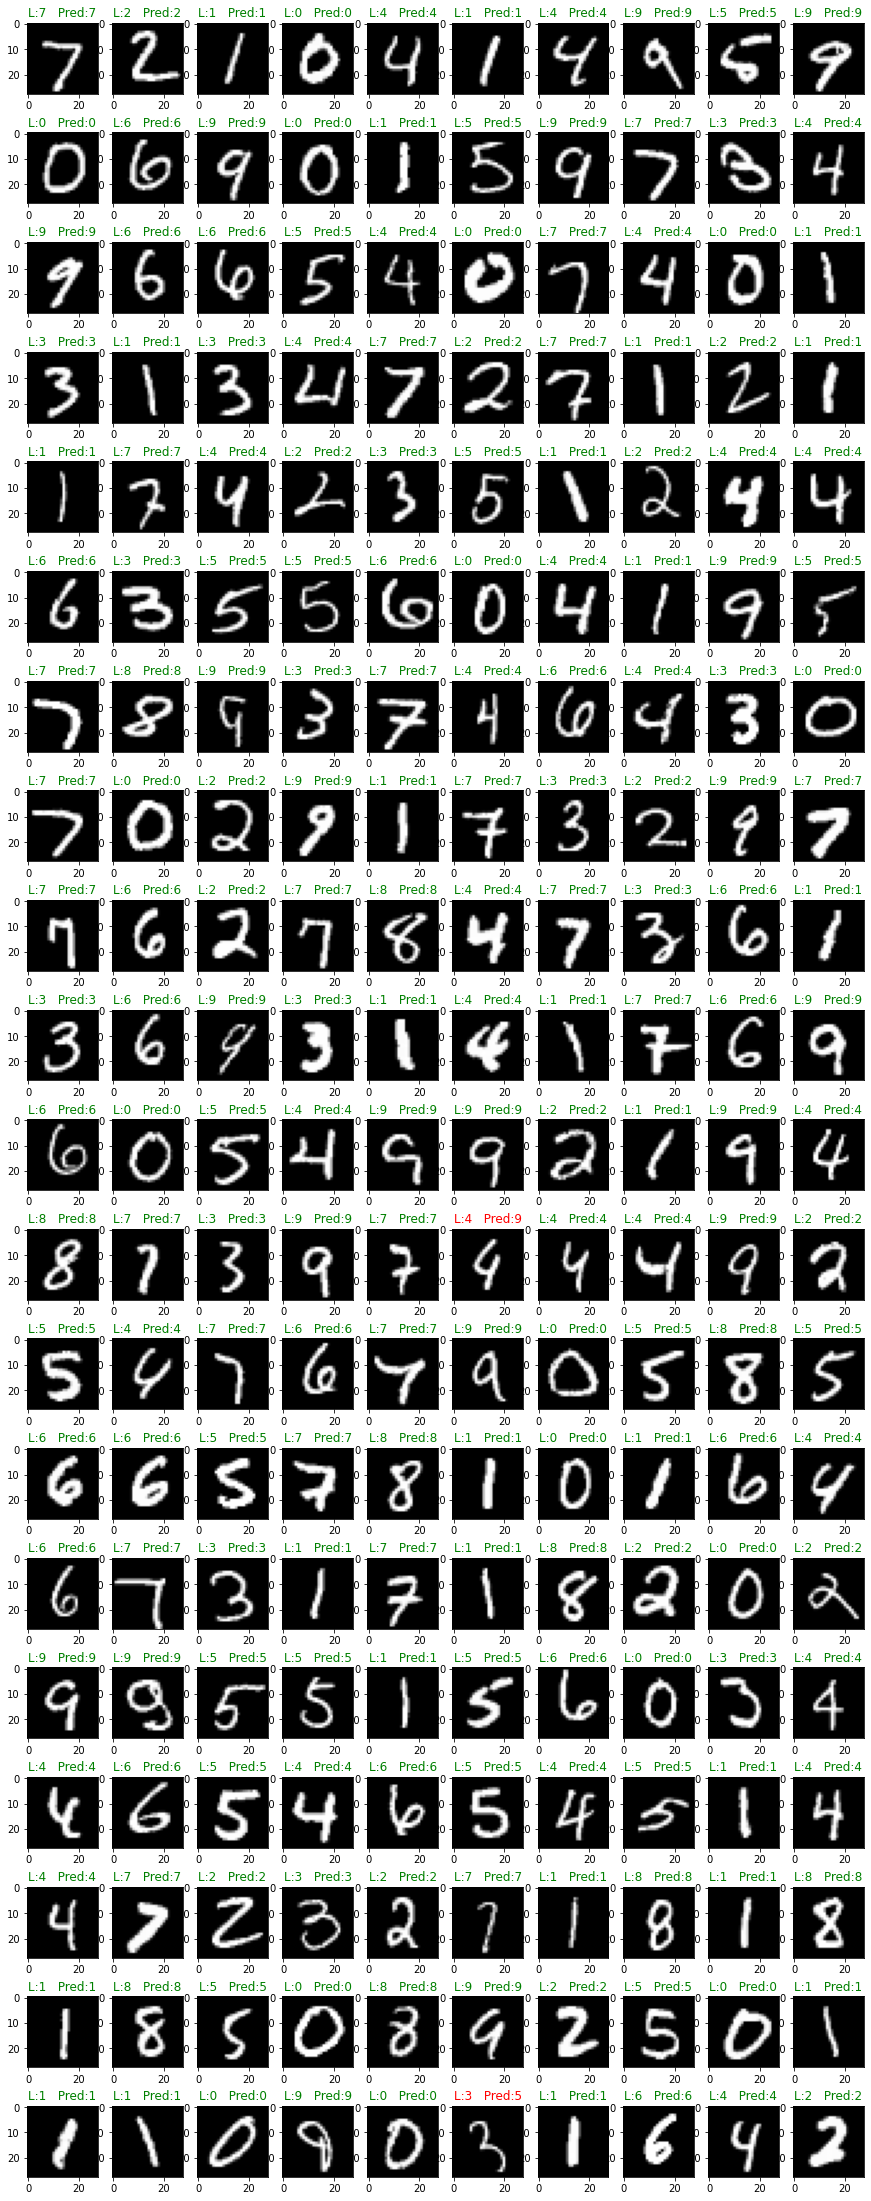

In [ ]:
num_of_examples = 200
num_row = 20
num_col = int(num_of_examples / num_row)
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_of_examples):
  # plot images
    ax = axes[i//num_col, i%num_col]
    image, label = test_data[i],test_labels[i]
    ax.imshow(image,cmap='gray')
    if np.argmax(predictions[i])== np.argmax(test_labels[i]):
      ax.set_title('L:{}   Pred:{}'.format(np.argmax(test_labels[i]),np.argmax(predictions[i])), color = 'green')# 'L' for Label , 'Pred' for Predicted values 
    else:
      ax.set_title('L:{}   Pred:{}'.format(np.argmax(test_labels[i]),np.argmax(predictions[i])), color = 'red')# 'L' for Label , 'Pred' for Predicted values 